In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [3]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores_group_prediction.pkl','rb') as f:
    scores_per_graph = pickle.load(f)

In [14]:
# DATA_PATH = './data/'
# with open(DATA_PATH+'scores_per_graph.pkl','rb') as f:
#     scores_per_graph = pickle.load(f)

In [4]:
len(scores_per_graph)

140

In [25]:
scl = scores_per_graph[32] # look at dataframe for first graph

In [26]:
scl.head()

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,177.0,465.0,9831,32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012194,0.107770,0.040359,0.013993,0.000000,0.022653
1,granulocytes,335.0,971.0,9832,32,0.003169,0.071103,0.011723,0.000000,0.000000,0.000000,0.089700,0.047944,0.043500,0.102396,0.027612,0.033975
2,granulocytes,361.0,994.0,9833,32,0.041352,0.116279,0.007022,0.117220,0.117096,0.008483,0.090709,0.000000,0.000000,0.126978,0.066030,0.051143
3,granulocytes,401.0,1209.0,9834,32,0.040193,0.000000,0.000000,0.069626,0.000000,0.114668,0.114852,0.018760,0.040196,0.096270,0.040195,0.039518
4,granulocytes,445.0,389.0,9835,32,0.000000,0.000000,0.005380,0.000000,0.028031,0.000000,0.000000,0.000000,0.000000,0.113518,0.000000,0.022433


In [27]:
# cell type counts for 100 most important cells in first graph
scl.sort_values('campp_median',ascending=False).cell_type[:100].value_counts()

tumor cells                   79
CD8+ T cells                   6
plasma cells                   4
CD68+CD163+ macrophages        4
CD4+ T cells CD45RO+           2
tumor cells / immune cells     2
stroma                         1
adipocytes                     1
vasculature                    1
Name: cell_type, dtype: int64

In [8]:
# cell type counts in entire graph
scl.cell_type.value_counts()

tumor cells                   1329
CD68+CD163+ macrophages        381
stroma                         186
vasculature                    177
CD8+ T cells                   173
smooth muscle                  161
CD4+ T cells CD45RO+           109
Tregs                           42
undefined                       29
plasma cells                    23
dirt                            18
B cells                         17
CD68+ macrophages               11
granulocytes                    10
CD11b+CD68+ macrophages          5
adipocytes                       4
nerves                           3
CD4+ T cells                     3
immune cells / vasculature       3
tumor cells / immune cells       2
CD3+ T cells                     1
CD11c+ DCs                       1
Name: cell_type, dtype: int64

In [9]:
# actual stage and predicted stage
scl.attrs

{'group': 2,
 'pred_0': tensor(2),
 'pred_1': tensor(2),
 'pred_2': tensor(2),
 'pred_3': tensor(2),
 'pred_4': tensor(1),
 'pred_5': tensor(2),
 'pred_6': tensor(2),
 'pred_7': tensor(2),
 'pred_8': tensor(2),
 'pred_9': tensor(2)}

In [10]:
coarse_map_inv = {
    'stroma': ['stroma'],
    'tumor': ['tumor cells'],
    'immune': ['granulocytes','CD4+ T cells CD45RO+','CD68+CD163+ macrophages',
              'plasma cells', 'CD8+ T cells', 'Tregs', 'CD4+ T cells',
              'CD11c+ DCs', 'B cells', 'CD11b+CD68+ macrophages',
              'immune cells', 'NK cells','CD68+ macrophages GzmB+', 'CD68+ macrophages',
              'CD11b+ monocytes', 'CD4+ T cells GATA3+', 'CD163+ macrophages','CD3+ T cells'],
    'vasculature':['vasculature']
}

In [11]:
coarse_map = {}
for k,v in coarse_map_inv.items():
    for x in v:
        coarse_map[x] = k

In [12]:
coarse_map

{'stroma': 'stroma',
 'tumor cells': 'tumor',
 'granulocytes': 'immune',
 'CD4+ T cells CD45RO+': 'immune',
 'CD68+CD163+ macrophages': 'immune',
 'plasma cells': 'immune',
 'CD8+ T cells': 'immune',
 'Tregs': 'immune',
 'CD4+ T cells': 'immune',
 'CD11c+ DCs': 'immune',
 'B cells': 'immune',
 'CD11b+CD68+ macrophages': 'immune',
 'immune cells': 'immune',
 'NK cells': 'immune',
 'CD68+ macrophages GzmB+': 'immune',
 'CD68+ macrophages': 'immune',
 'CD11b+ monocytes': 'immune',
 'CD4+ T cells GATA3+': 'immune',
 'CD163+ macrophages': 'immune',
 'CD3+ T cells': 'immune',
 'vasculature': 'vasculature'}

In [13]:
scl.head()

,cell_type,X,Y,cell_id,spot_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad
0,granulocytes,347.0,356.0,11938,56,0.278363,0.018205,0.008472,0.443184,0.000000,0.005935,0.098766,0.006994,0.060406,0.178385,0.039306,0.114064
1,granulocytes,447.0,936.0,11939,56,0.080790,0.000000,0.084255,0.026616,0.020287,0.065811,0.001620,0.252203,0.130289,0.057680,0.061746,0.051943
2,granulocytes,483.0,294.0,11940,56,0.231564,0.277198,0.000715,0.000000,0.000000,0.009881,0.020630,0.000000,0.022651,0.000000,0.005298,0.079247
3,granulocytes,730.0,609.0,11941,56,0.036568,0.104606,0.015342,0.307312,0.002326,0.107453,0.235715,0.000000,0.077587,0.106328,0.091096,0.072959
4,granulocytes,947.0,266.0,11942,56,0.077631,0.000000,0.000000,0.308385,0.000000,0.004236,0.038800,0.086610,0.000000,0.093553,0.021518,0.064499


In [28]:
scl['coarse_type'] = scl['cell_type'].map(coarse_map).fillna('other')

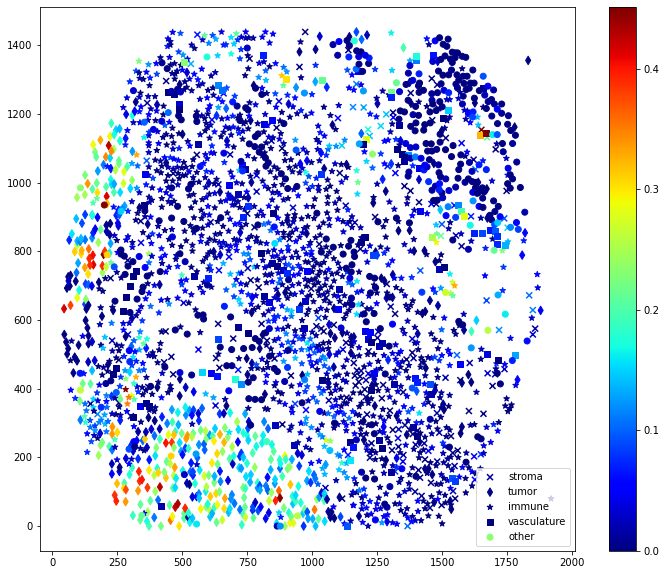

In [29]:
fig, ax = plt.subplots(figsize=(12,10))

mkr_dict = {'stroma': 'x', 'tumor': 'd', 'immune': '*','vasculature':'s', 'other':'o'}
for k,v in mkr_dict.items():
    d = scl[scl.coarse_type==k]
    ax.scatter(d.X, d.Y, 
                c = d.campp_median, 
                marker = v,label=k,
              cmap = 'jet')
ax.legend()
norm = plt.Normalize(np.min(scl.campp_median), np.max(scl.campp_median))
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
plt.show()

In [106]:
scl.sort_values('campp_median',ascending=False).head()

,cell_type,X,Y,cell_id,graph_id,campp_0,campp_1,campp_2,campp_3,campp_4,campp_5,campp_6,campp_7,campp_8,campp_9,campp_median,campp_mad,coarse_type
841,CD68+CD163+ macrophages,1534.0,1187.0,153308,120,0.999999,0.809399,1.000000,0.997097,0.740029,0.924307,0.998466,0.999992,0.863741,0.988501,0.992799,0.078227,immune
80,vasculature,229.0,407.0,32546,120,0.924508,0.797328,0.574690,0.672845,0.999974,0.843439,0.913372,0.726947,0.999999,0.847976,0.845708,0.109724,vasculature
90,vasculature,286.0,693.0,32556,120,0.855718,0.612981,0.470682,0.740435,0.894548,0.817897,0.852331,0.786986,0.782593,0.913009,0.802441,0.098811,vasculature
113,vasculature,674.0,15.0,32579,120,0.813294,0.615302,0.554194,0.587062,0.825089,0.804610,0.690458,0.880131,0.791522,0.791653,0.791588,0.098862,vasculature
28,granulocytes,720.0,886.0,20817,120,0.787198,0.800840,0.707224,0.802197,0.819201,0.762767,0.863974,0.793772,0.778482,0.556053,0.790485,0.055094,immune


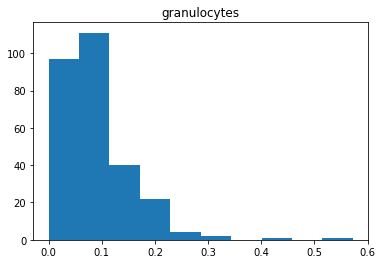

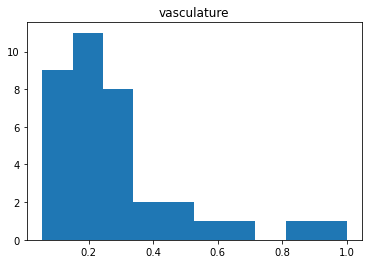

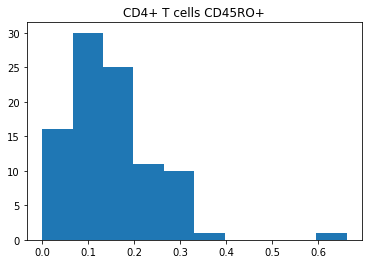

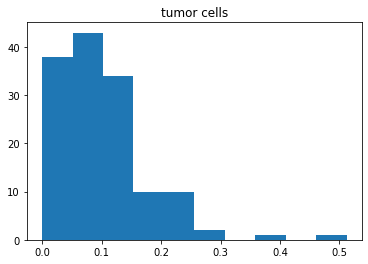

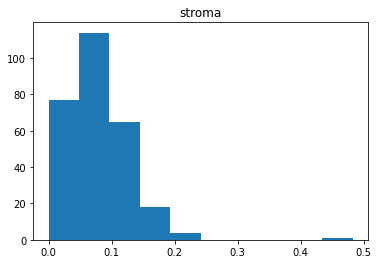

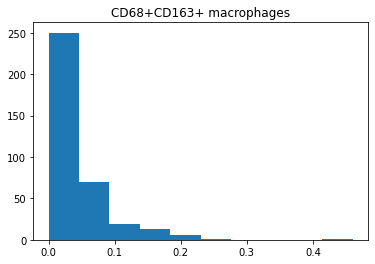

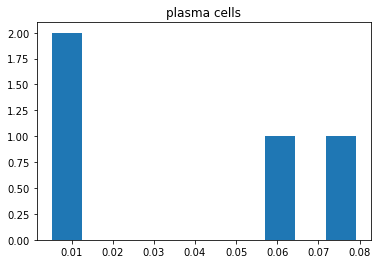

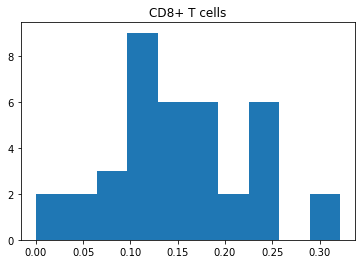

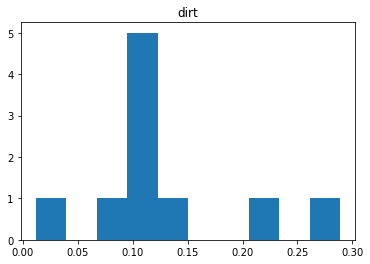

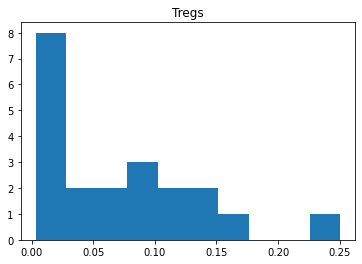

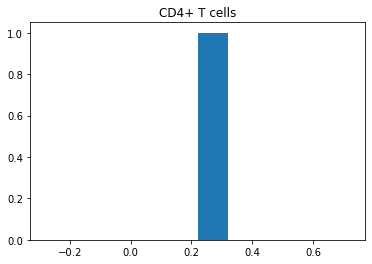

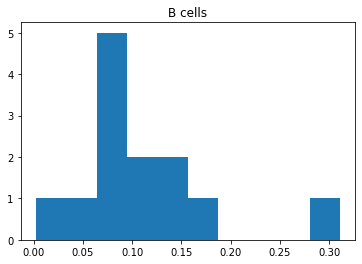

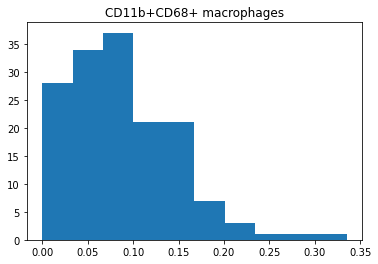

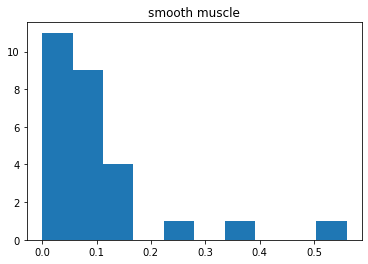

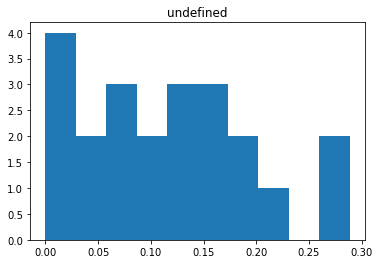

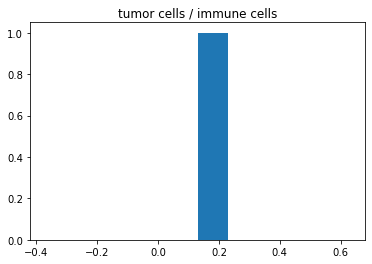

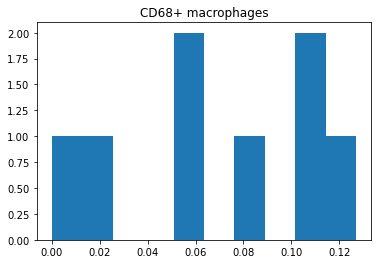

In [44]:
# plot histogram of scores per cell type
for ct in scl.cell_type.unique():
    plt.hist(scl[scl['cell_type'] == ct].campp_median)
    plt.title(ct)
    plt.show()